In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
%matplotlib inline

In [124]:
train = pd.read_csv("Drugstore_data/train.csv", parse_dates=[2])#, dtype=types)
test = pd.read_csv("Drugstore_data/test.csv", parse_dates=[3])#, dtype=types)
store = pd.read_csv("Drugstore_data/store.csv")

C:\Users\ahn92\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
valid = train[:split_index] 
valid.head()

,Store,DayOfWeek,Promo,SchoolHoliday,StoreType_x,Assortment_x,CompetitionDistance_x,CompetitionOpenSinceMonth_x,CompetitionOpenSinceYear_x,Promo2_x,...,Sales,StoreType_y,Assortment_y,CompetitionDistance_y,CompetitionOpenSinceMonth_y,CompetitionOpenSinceYear_y,Promo2_y,Promo2SinceWeek_y,Promo2SinceYear_y,PromoInterval
0,1,3,0,1,3,1,1270.0,9.0,2008.0,0,...,5530,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,0,1,3,1,1270.0,9.0,2008.0,0,...,4327,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,5,0,1,3,1,1270.0,9.0,2008.0,0,...,4486,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,6,0,1,3,1,1270.0,9.0,2008.0,0,...,4997,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,1,1,3,1,1270.0,9.0,2008.0,0,...,7176,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [145]:
valid['err'] = valid['y']-valid['yhat']

In [149]:
valid['err'] = valid.err.map(lambda x : x*x)

In [155]:
valid.groupby('Store').mean()['err'][valid.groupby('Store').mean()['err']==2834829.886570769]

Store
31    2.834830e+06
Name: err, dtype: float64

Text(0.5,1,'Store 10 Sales Distribution')

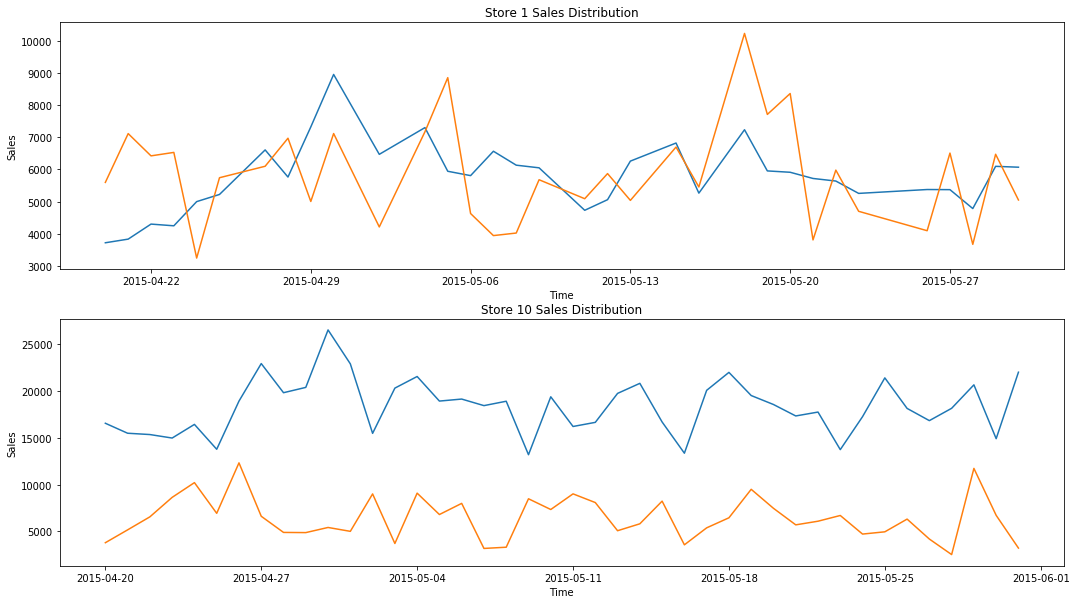

In [156]:
valid['y']=np.expm1(y_valid)
valid['yhat'] = np.expm1(y_pred)
# draw store 1 and store 10 sales distribution plot
import matplotlib.pyplot as plt
store_1 = valid.loc[(valid["Store"]==31)&(valid['y']>0), ['Date',"y",'yhat']]
store_10 = valid.loc[(valid["Store"]==562)&(valid['y']>0), ['Date',"y",'yhat']]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['y'], '-')
ax1.plot(store_1['Date'], store_1['yhat'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['y'], '-')
ax2.plot(store_10['Date'], store_10['yhat'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

Text(0.5,1,'Store Daily Open Countplot')

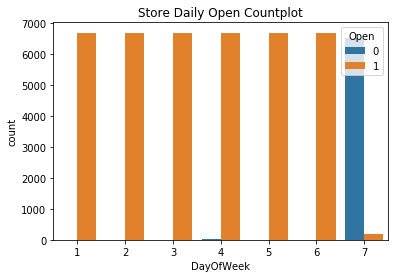

In [35]:
# check stores open distribution on days of week
import seaborn as sns
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = test)
plt.title('Store Daily Open Countplot')

In [74]:
# check missing values in test open column
test[test.Open.isnull()]

,ID,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday


In [106]:
# fill missing values in test with 1
test.fillna(value = 1, inplace = True)

In [125]:
# merge data with store 
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

# split the last 6 weeks data as hold-out set (idea from Gert https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
train = train.sort_values(['Date'],ascending = False)
train_total = train.copy()

split_index = 6*7*1115
valid = train[:split_index] 
train = train[split_index:]

# only use data of Sales>0 and Open is 1
valid = valid[(valid.Open != 0)&(valid.Sales >0)]
train = train[(train.Open != 0)&(train.Sales >0)]
train_total = train_total[(train_total.Open != 0)&(train_total.Sales >0)]

C:\Users\ahn92\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ahn92\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


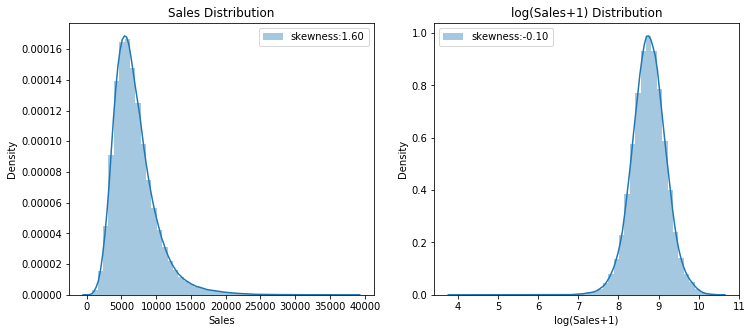

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# check distribution of sales in train set
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(train['Sales'],hist = True,label='skewness:{:.2f}'.format(train['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(train['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(train['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [108]:
# process train and test
def process(data, isTest = False):
    # label encode some features
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    #data.StateHoliday.replace(mappings, inplace=True)
    
    # extract some features from date column  
    data['Month'] = data.Date.dt.month
    data['Year'] = data.Date.dt.year
    data['Day'] = data.Date.dt.day
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    # calculate competiter open time in months
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
    
    # calculate promo2 open time in months
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data['PromoOpen'].apply(lambda x: x if x > 0 else 0)
                                                 
    # Indicate whether the month is in promo interval
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['month_str'] = data.Month.map(month2str)

    def check(row):
        if isinstance(row['PromoInterval'],str) and row['month_str'] in row['PromoInterval']:
            return 1
        else:
            return 0
        
    data['IsPromoMonth'] =  data.apply(lambda row: check(row),axis=1)    
    
    # select the features we need
    features = ['Store', 'DayOfWeek', 'Promo',  'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']  
    if not isTest:
        features.append('Sales')
        
    data = data[features]
    return data

train = process(train)
valid = process(valid)
train_total = process(train_total)
x_test = process(test,isTest = True)    

In [109]:
# sort by index
valid.sort_index(inplace = True)
train.sort_index(inplace = True)
train_total.sort_index(inplace = True)

# split x and y
x_train, y_train = train.drop(columns = ['Sales']), np.log1p(train['Sales'])
x_valid, y_valid = valid.drop(columns = ['Sales']), np.log1p(valid['Sales'])
x_train_total, y_train_total = train_total.drop(columns = ['Sales']), np.log1p(train_total['Sales'])

In [42]:
# define eval metrics
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [43]:
# try random forest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)
clf.fit(x_train, y_train)
# validation
y_pred = clf.predict(x_valid)
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1389


Text(0.5,1,'Feature Importance')

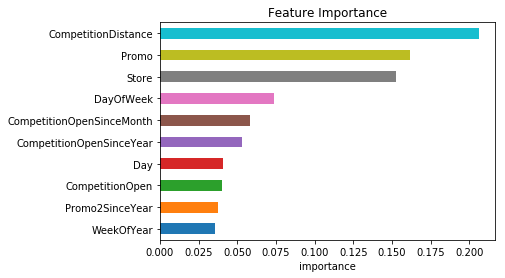

In [44]:
# plot feature importance for random forest model, show top 10 features
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [45]:
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

[0]	train-rmse:8.01642	eval-rmse:8.06774	train-rmspe:0.999808	eval-rmspe:0.999819
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.7764	eval-rmse:7.82838	train-rmspe:0.999709	eval-rmspe:0.999727
[2]	train-rmse:7.54362	eval-rmse:7.59611	train-rmspe:0.999588	eval-rmspe:0.999613
[3]	train-rmse:7.31786	eval-rmse:7.37086	train-rmspe:0.999441	eval-rmspe:0.999475
[4]	train-rmse:7.0989	eval-rmse:7.15196	train-rmspe:0.999263	eval-rmspe:0.999308
[5]	train-rmse:6.88644	eval-rmse:6.93999	train-rmspe:0.999049	eval-rmspe:0.999107
[6]	train-rmse:6.68034	eval-rmse:6.73441	train-rmspe:0.998795	eval-rmspe:0.998868
[7]	train-rmse:6.48043	eval-rmse:6.53499	train-rmspe:0.998492	eval-rmspe:0.998585
[8]	train-rmse:6.28656	eval-rmse:6.34168	train-rmspe:0.998136	eval-rmspe:0.998251
[9]	train-rmse:6.09859	eval-rmse:6.15376	train-rmspe:0.997716	eval-rmspe:0.997857
[10]	train-rmse:5.91621	eval-rmse:5.

[97]	train-rmse:0.487376	eval-rmse:0.527274	train-rmspe:0.379108	eval-rmspe:0.390246
[98]	train-rmse:0.476498	eval-rmse:0.516269	train-rmspe:0.373232	eval-rmspe:0.383884
[99]	train-rmse:0.465869	eval-rmse:0.505338	train-rmspe:0.36752	eval-rmspe:0.377541
[100]	train-rmse:0.455637	eval-rmse:0.494681	train-rmspe:0.361952	eval-rmspe:0.371348
[101]	train-rmse:0.445747	eval-rmse:0.484657	train-rmspe:0.356642	eval-rmspe:0.365496
[102]	train-rmse:0.436093	eval-rmse:0.474938	train-rmspe:0.35141	eval-rmspe:0.35977
[103]	train-rmse:0.426844	eval-rmse:0.465415	train-rmspe:0.346441	eval-rmspe:0.35415
[104]	train-rmse:0.417935	eval-rmse:0.456245	train-rmspe:0.341718	eval-rmspe:0.348736
[105]	train-rmse:0.409307	eval-rmse:0.447387	train-rmspe:0.33715	eval-rmspe:0.343487
[106]	train-rmse:0.401327	eval-rmse:0.439006	train-rmspe:0.33293	eval-rmspe:0.338459
[107]	train-rmse:0.393428	eval-rmse:0.430772	train-rmspe:0.328797	eval-rmspe:0.333545
[108]	train-rmse:0.38603	eval-rmse:0.422808	train-rmspe:0.32495

[193]	train-rmse:0.198978	eval-rmse:0.216256	train-rmspe:0.246436	eval-rmspe:0.213741
[194]	train-rmse:0.198742	eval-rmse:0.215938	train-rmspe:0.246472	eval-rmspe:0.213661
[195]	train-rmse:0.198229	eval-rmse:0.215382	train-rmspe:0.246242	eval-rmspe:0.213321
[196]	train-rmse:0.19704	eval-rmse:0.214258	train-rmspe:0.245345	eval-rmspe:0.212327
[197]	train-rmse:0.196769	eval-rmse:0.213973	train-rmspe:0.245261	eval-rmspe:0.212144
[198]	train-rmse:0.196219	eval-rmse:0.21337	train-rmspe:0.244967	eval-rmspe:0.211719
[199]	train-rmse:0.195825	eval-rmse:0.213003	train-rmspe:0.244873	eval-rmspe:0.211571
[200]	train-rmse:0.195475	eval-rmse:0.212577	train-rmspe:0.244765	eval-rmspe:0.211317
[201]	train-rmse:0.195192	eval-rmse:0.212236	train-rmspe:0.244743	eval-rmspe:0.211141
[202]	train-rmse:0.194669	eval-rmse:0.211741	train-rmspe:0.244453	eval-rmspe:0.210684
[203]	train-rmse:0.194404	eval-rmse:0.211561	train-rmspe:0.244314	eval-rmspe:0.21046
[204]	train-rmse:0.1937	eval-rmse:0.210884	train-rmspe:0.

[289]	train-rmse:0.156853	eval-rmse:0.176037	train-rmspe:0.204358	eval-rmspe:0.179999
[290]	train-rmse:0.15615	eval-rmse:0.175397	train-rmspe:0.203764	eval-rmspe:0.179349
[291]	train-rmse:0.156033	eval-rmse:0.175296	train-rmspe:0.20364	eval-rmspe:0.17927
[292]	train-rmse:0.155573	eval-rmse:0.17491	train-rmspe:0.203266	eval-rmspe:0.178956
[293]	train-rmse:0.155415	eval-rmse:0.174783	train-rmspe:0.203056	eval-rmspe:0.178953
[294]	train-rmse:0.155203	eval-rmse:0.174589	train-rmspe:0.202862	eval-rmspe:0.178759
[295]	train-rmse:0.154875	eval-rmse:0.174332	train-rmspe:0.202584	eval-rmspe:0.178517
[296]	train-rmse:0.154617	eval-rmse:0.174104	train-rmspe:0.202396	eval-rmspe:0.178308
[297]	train-rmse:0.154017	eval-rmse:0.173601	train-rmspe:0.201915	eval-rmspe:0.177817
[298]	train-rmse:0.153725	eval-rmse:0.173335	train-rmspe:0.201582	eval-rmspe:0.177526
[299]	train-rmse:0.153427	eval-rmse:0.172988	train-rmspe:0.201361	eval-rmspe:0.177202
[300]	train-rmse:0.153307	eval-rmse:0.173011	train-rmspe:0

[385]	train-rmse:0.133745	eval-rmse:0.156424	train-rmspe:0.171052	eval-rmspe:0.161069
[386]	train-rmse:0.133584	eval-rmse:0.156313	train-rmspe:0.17088	eval-rmspe:0.160951
[387]	train-rmse:0.133375	eval-rmse:0.156154	train-rmspe:0.170689	eval-rmspe:0.160779
[388]	train-rmse:0.133205	eval-rmse:0.156006	train-rmspe:0.170543	eval-rmspe:0.160667
[389]	train-rmse:0.133042	eval-rmse:0.155858	train-rmspe:0.170398	eval-rmspe:0.160523
[390]	train-rmse:0.132952	eval-rmse:0.155824	train-rmspe:0.17031	eval-rmspe:0.160491
[391]	train-rmse:0.132784	eval-rmse:0.155688	train-rmspe:0.170181	eval-rmspe:0.160338
[392]	train-rmse:0.132609	eval-rmse:0.155517	train-rmspe:0.169548	eval-rmspe:0.160171
[393]	train-rmse:0.132502	eval-rmse:0.155591	train-rmspe:0.169412	eval-rmspe:0.160227
[394]	train-rmse:0.132363	eval-rmse:0.155489	train-rmspe:0.169274	eval-rmspe:0.160115
[395]	train-rmse:0.132174	eval-rmse:0.155479	train-rmspe:0.169099	eval-rmspe:0.160096
[396]	train-rmse:0.132068	eval-rmse:0.155381	train-rmspe

[481]	train-rmse:0.121382	eval-rmse:0.147591	train-rmspe:0.155452	eval-rmspe:0.152421
[482]	train-rmse:0.121327	eval-rmse:0.147562	train-rmspe:0.155378	eval-rmspe:0.152411
[483]	train-rmse:0.121188	eval-rmse:0.147448	train-rmspe:0.155261	eval-rmspe:0.152293
[484]	train-rmse:0.121137	eval-rmse:0.147418	train-rmspe:0.155211	eval-rmspe:0.15227
[485]	train-rmse:0.12104	eval-rmse:0.147336	train-rmspe:0.155127	eval-rmspe:0.152171
[486]	train-rmse:0.120923	eval-rmse:0.147251	train-rmspe:0.15501	eval-rmspe:0.152065
[487]	train-rmse:0.120832	eval-rmse:0.147213	train-rmspe:0.154916	eval-rmspe:0.152013
[488]	train-rmse:0.120701	eval-rmse:0.147102	train-rmspe:0.154801	eval-rmspe:0.151888
[489]	train-rmse:0.120624	eval-rmse:0.147046	train-rmspe:0.154733	eval-rmspe:0.151831
[490]	train-rmse:0.120588	eval-rmse:0.147019	train-rmspe:0.154694	eval-rmspe:0.151815
[491]	train-rmse:0.120474	eval-rmse:0.146968	train-rmspe:0.154578	eval-rmspe:0.15175
[492]	train-rmse:0.120301	eval-rmse:0.146841	train-rmspe:0

[577]	train-rmse:0.112399	eval-rmse:0.141747	train-rmspe:0.144374	eval-rmspe:0.146347
[578]	train-rmse:0.112241	eval-rmse:0.141641	train-rmspe:0.144224	eval-rmspe:0.146239
[579]	train-rmse:0.112142	eval-rmse:0.141571	train-rmspe:0.144139	eval-rmspe:0.14617
[580]	train-rmse:0.112075	eval-rmse:0.141523	train-rmspe:0.144082	eval-rmspe:0.146123
[581]	train-rmse:0.111936	eval-rmse:0.141433	train-rmspe:0.143942	eval-rmspe:0.146041
[582]	train-rmse:0.111847	eval-rmse:0.141373	train-rmspe:0.143857	eval-rmspe:0.145986
[583]	train-rmse:0.111738	eval-rmse:0.141304	train-rmspe:0.14375	eval-rmspe:0.145907
[584]	train-rmse:0.11166	eval-rmse:0.141187	train-rmspe:0.143679	eval-rmspe:0.145781
[585]	train-rmse:0.111606	eval-rmse:0.141163	train-rmspe:0.143142	eval-rmspe:0.145753
[586]	train-rmse:0.111473	eval-rmse:0.141072	train-rmspe:0.14303	eval-rmspe:0.145667
[587]	train-rmse:0.111419	eval-rmse:0.141042	train-rmspe:0.142983	eval-rmspe:0.145647
[588]	train-rmse:0.111387	eval-rmse:0.140994	train-rmspe:0

[673]	train-rmse:0.105353	eval-rmse:0.137895	train-rmspe:0.130137	eval-rmspe:0.142363
[674]	train-rmse:0.105279	eval-rmse:0.137839	train-rmspe:0.130031	eval-rmspe:0.142317
[675]	train-rmse:0.105199	eval-rmse:0.137797	train-rmspe:0.129944	eval-rmspe:0.142266
[676]	train-rmse:0.105149	eval-rmse:0.13782	train-rmspe:0.129875	eval-rmspe:0.14228
[677]	train-rmse:0.105102	eval-rmse:0.137798	train-rmspe:0.12983	eval-rmspe:0.14226
[678]	train-rmse:0.105028	eval-rmse:0.13774	train-rmspe:0.129763	eval-rmspe:0.1422
[679]	train-rmse:0.10494	eval-rmse:0.137689	train-rmspe:0.129675	eval-rmspe:0.142144
[680]	train-rmse:0.104903	eval-rmse:0.137664	train-rmspe:0.129582	eval-rmspe:0.142123
[681]	train-rmse:0.10484	eval-rmse:0.137635	train-rmspe:0.129521	eval-rmspe:0.142092
[682]	train-rmse:0.104776	eval-rmse:0.137605	train-rmspe:0.129465	eval-rmspe:0.142064
[683]	train-rmse:0.104742	eval-rmse:0.137591	train-rmspe:0.129432	eval-rmspe:0.142048
[684]	train-rmse:0.104674	eval-rmse:0.137528	train-rmspe:0.1293

[769]	train-rmse:0.100237	eval-rmse:0.135008	train-rmspe:0.120762	eval-rmspe:0.139493
[770]	train-rmse:0.100111	eval-rmse:0.134932	train-rmspe:0.120642	eval-rmspe:0.139421
[771]	train-rmse:0.100034	eval-rmse:0.13487	train-rmspe:0.120568	eval-rmspe:0.139364
[772]	train-rmse:0.099978	eval-rmse:0.134843	train-rmspe:0.120514	eval-rmspe:0.139334
[773]	train-rmse:0.099947	eval-rmse:0.134825	train-rmspe:0.120468	eval-rmspe:0.139324
[774]	train-rmse:0.099887	eval-rmse:0.134783	train-rmspe:0.120415	eval-rmspe:0.13928
[775]	train-rmse:0.099831	eval-rmse:0.134746	train-rmspe:0.120351	eval-rmspe:0.139245
[776]	train-rmse:0.099756	eval-rmse:0.134887	train-rmspe:0.120246	eval-rmspe:0.139348
[777]	train-rmse:0.09971	eval-rmse:0.134824	train-rmspe:0.120201	eval-rmspe:0.139276
[778]	train-rmse:0.099665	eval-rmse:0.134797	train-rmspe:0.120161	eval-rmspe:0.139253
[779]	train-rmse:0.099643	eval-rmse:0.134786	train-rmspe:0.119963	eval-rmspe:0.139242
[780]	train-rmse:0.099619	eval-rmse:0.13473	train-rmspe:0

[865]	train-rmse:0.095967	eval-rmse:0.133132	train-rmspe:0.113442	eval-rmspe:0.137495
[866]	train-rmse:0.095929	eval-rmse:0.133096	train-rmspe:0.113385	eval-rmspe:0.137468
[867]	train-rmse:0.095886	eval-rmse:0.133064	train-rmspe:0.113343	eval-rmspe:0.137443
[868]	train-rmse:0.095853	eval-rmse:0.13305	train-rmspe:0.113313	eval-rmspe:0.137433
[869]	train-rmse:0.09582	eval-rmse:0.133029	train-rmspe:0.113272	eval-rmspe:0.137411
[870]	train-rmse:0.095766	eval-rmse:0.132995	train-rmspe:0.113221	eval-rmspe:0.137375
[871]	train-rmse:0.095738	eval-rmse:0.132997	train-rmspe:0.113193	eval-rmspe:0.137372
[872]	train-rmse:0.095706	eval-rmse:0.132976	train-rmspe:0.113155	eval-rmspe:0.137344
[873]	train-rmse:0.095649	eval-rmse:0.132933	train-rmspe:0.113059	eval-rmspe:0.137301
[874]	train-rmse:0.095588	eval-rmse:0.132894	train-rmspe:0.113	eval-rmspe:0.137265
[875]	train-rmse:0.095555	eval-rmse:0.132874	train-rmspe:0.112953	eval-rmspe:0.137274
[876]	train-rmse:0.0955	eval-rmse:0.132846	train-rmspe:0.11

[961]	train-rmse:0.092621	eval-rmse:0.131937	train-rmspe:0.107835	eval-rmspe:0.136169
[962]	train-rmse:0.092592	eval-rmse:0.131927	train-rmspe:0.1078	eval-rmspe:0.136161
[963]	train-rmse:0.092536	eval-rmse:0.131898	train-rmspe:0.107746	eval-rmspe:0.136133
[964]	train-rmse:0.092517	eval-rmse:0.131886	train-rmspe:0.107727	eval-rmspe:0.136122
[965]	train-rmse:0.092504	eval-rmse:0.131881	train-rmspe:0.107618	eval-rmspe:0.136116
[966]	train-rmse:0.092489	eval-rmse:0.131877	train-rmspe:0.107604	eval-rmspe:0.136112
[967]	train-rmse:0.092419	eval-rmse:0.131842	train-rmspe:0.107533	eval-rmspe:0.136079
[968]	train-rmse:0.092401	eval-rmse:0.131835	train-rmspe:0.107518	eval-rmspe:0.136073
[969]	train-rmse:0.092361	eval-rmse:0.131809	train-rmspe:0.107478	eval-rmspe:0.13605
[970]	train-rmse:0.092328	eval-rmse:0.13179	train-rmspe:0.107449	eval-rmspe:0.136038
[971]	train-rmse:0.092284	eval-rmse:0.131772	train-rmspe:0.107404	eval-rmspe:0.136019
[972]	train-rmse:0.092263	eval-rmse:0.131765	train-rmspe:0

[1057]	train-rmse:0.089859	eval-rmse:0.131101	train-rmspe:0.104114	eval-rmspe:0.135195
[1058]	train-rmse:0.089845	eval-rmse:0.131099	train-rmspe:0.104097	eval-rmspe:0.13519
[1059]	train-rmse:0.089837	eval-rmse:0.131096	train-rmspe:0.10409	eval-rmspe:0.135186
[1060]	train-rmse:0.089816	eval-rmse:0.131089	train-rmspe:0.104068	eval-rmspe:0.13518
[1061]	train-rmse:0.089776	eval-rmse:0.131054	train-rmspe:0.103996	eval-rmspe:0.135151
[1062]	train-rmse:0.089754	eval-rmse:0.131049	train-rmspe:0.103973	eval-rmspe:0.135146
[1063]	train-rmse:0.089749	eval-rmse:0.131048	train-rmspe:0.103968	eval-rmspe:0.135144
[1064]	train-rmse:0.089737	eval-rmse:0.131046	train-rmspe:0.103776	eval-rmspe:0.135144
[1065]	train-rmse:0.089717	eval-rmse:0.131036	train-rmspe:0.103757	eval-rmspe:0.135137
[1066]	train-rmse:0.089697	eval-rmse:0.131026	train-rmspe:0.103738	eval-rmspe:0.135126
[1067]	train-rmse:0.089661	eval-rmse:0.131003	train-rmspe:0.103704	eval-rmspe:0.135105
[1068]	train-rmse:0.089646	eval-rmse:0.131003	

[1152]	train-rmse:0.087552	eval-rmse:0.130487	train-rmspe:0.100692	eval-rmspe:0.134529
[1153]	train-rmse:0.087532	eval-rmse:0.130498	train-rmspe:0.100672	eval-rmspe:0.134534
[1154]	train-rmse:0.087514	eval-rmse:0.130501	train-rmspe:0.100641	eval-rmspe:0.134536
[1155]	train-rmse:0.087498	eval-rmse:0.130513	train-rmspe:0.100625	eval-rmspe:0.134544
[1156]	train-rmse:0.087476	eval-rmse:0.130509	train-rmspe:0.100601	eval-rmspe:0.134544
[1157]	train-rmse:0.087455	eval-rmse:0.130504	train-rmspe:0.100572	eval-rmspe:0.134539
[1158]	train-rmse:0.087441	eval-rmse:0.130496	train-rmspe:0.10056	eval-rmspe:0.134531
[1159]	train-rmse:0.087424	eval-rmse:0.130497	train-rmspe:0.100542	eval-rmspe:0.134532
[1160]	train-rmse:0.08741	eval-rmse:0.130495	train-rmspe:0.100453	eval-rmspe:0.13453
[1161]	train-rmse:0.087395	eval-rmse:0.130494	train-rmspe:0.100438	eval-rmspe:0.13453
[1162]	train-rmse:0.087381	eval-rmse:0.130489	train-rmspe:0.100423	eval-rmspe:0.134523
[1163]	train-rmse:0.087365	eval-rmse:0.130481	t

[1247]	train-rmse:0.08553	eval-rmse:0.130455	train-rmspe:0.097922	eval-rmspe:0.134183
[1248]	train-rmse:0.085506	eval-rmse:0.130454	train-rmspe:0.097891	eval-rmspe:0.134189
[1249]	train-rmse:0.085492	eval-rmse:0.130451	train-rmspe:0.097884	eval-rmspe:0.134183
[1250]	train-rmse:0.085477	eval-rmse:0.130487	train-rmspe:0.09787	eval-rmspe:0.134192
[1251]	train-rmse:0.085436	eval-rmse:0.130467	train-rmspe:0.097828	eval-rmspe:0.134176
[1252]	train-rmse:0.085417	eval-rmse:0.130456	train-rmspe:0.097808	eval-rmspe:0.134165
[1253]	train-rmse:0.085397	eval-rmse:0.130452	train-rmspe:0.097786	eval-rmspe:0.134164
[1254]	train-rmse:0.085381	eval-rmse:0.130439	train-rmspe:0.097769	eval-rmspe:0.134143
[1255]	train-rmse:0.085353	eval-rmse:0.130425	train-rmspe:0.097735	eval-rmspe:0.134131
[1256]	train-rmse:0.08534	eval-rmse:0.130419	train-rmspe:0.097721	eval-rmspe:0.134127
[1257]	train-rmse:0.085326	eval-rmse:0.130414	train-rmspe:0.097707	eval-rmspe:0.134125
[1258]	train-rmse:0.085312	eval-rmse:0.130414	

[1342]	train-rmse:0.083694	eval-rmse:0.13021	train-rmspe:0.095212	eval-rmspe:0.133807
[1343]	train-rmse:0.083662	eval-rmse:0.130238	train-rmspe:0.095159	eval-rmspe:0.133812
[1344]	train-rmse:0.083645	eval-rmse:0.130233	train-rmspe:0.095139	eval-rmspe:0.133809
[1345]	train-rmse:0.083624	eval-rmse:0.130245	train-rmspe:0.095107	eval-rmspe:0.133801
[1346]	train-rmse:0.083604	eval-rmse:0.130233	train-rmspe:0.095071	eval-rmspe:0.133794
[1347]	train-rmse:0.083573	eval-rmse:0.130218	train-rmspe:0.09501	eval-rmspe:0.133779
[1348]	train-rmse:0.083554	eval-rmse:0.130214	train-rmspe:0.09497	eval-rmspe:0.133777
[1349]	train-rmse:0.083541	eval-rmse:0.130212	train-rmspe:0.094948	eval-rmspe:0.133776
[1350]	train-rmse:0.083528	eval-rmse:0.130208	train-rmspe:0.094931	eval-rmspe:0.133771
[1351]	train-rmse:0.083508	eval-rmse:0.130209	train-rmspe:0.094911	eval-rmspe:0.133771
[1352]	train-rmse:0.083479	eval-rmse:0.130195	train-rmspe:0.094874	eval-rmspe:0.133756
[1353]	train-rmse:0.083461	eval-rmse:0.130192	

[1437]	train-rmse:0.082018	eval-rmse:0.130251	train-rmspe:0.092648	eval-rmspe:0.133599
[1438]	train-rmse:0.082	eval-rmse:0.13025	train-rmspe:0.092606	eval-rmspe:0.133597
[1439]	train-rmse:0.081989	eval-rmse:0.13025	train-rmspe:0.092596	eval-rmspe:0.133596
[1440]	train-rmse:0.081964	eval-rmse:0.130237	train-rmspe:0.092561	eval-rmspe:0.133583
[1441]	train-rmse:0.081945	eval-rmse:0.130242	train-rmspe:0.092541	eval-rmspe:0.133588
[1442]	train-rmse:0.081939	eval-rmse:0.13024	train-rmspe:0.092534	eval-rmspe:0.133585
[1443]	train-rmse:0.081919	eval-rmse:0.130233	train-rmspe:0.092514	eval-rmspe:0.133579
[1444]	train-rmse:0.081912	eval-rmse:0.130234	train-rmspe:0.092505	eval-rmspe:0.133577
[1445]	train-rmse:0.081886	eval-rmse:0.130223	train-rmspe:0.092469	eval-rmspe:0.133567
[1446]	train-rmse:0.081874	eval-rmse:0.130225	train-rmspe:0.092457	eval-rmspe:0.133569
[1447]	train-rmse:0.08187	eval-rmse:0.130231	train-rmspe:0.092452	eval-rmspe:0.133561
[1448]	train-rmse:0.081842	eval-rmse:0.130228	trai

[1532]	train-rmse:0.08051	eval-rmse:0.1301	train-rmspe:0.090294	eval-rmspe:0.133349
[1533]	train-rmse:0.080499	eval-rmse:0.1301	train-rmspe:0.090283	eval-rmspe:0.133349
[1534]	train-rmse:0.08048	eval-rmse:0.130095	train-rmspe:0.090261	eval-rmspe:0.133346
[1535]	train-rmse:0.080464	eval-rmse:0.13009	train-rmspe:0.090238	eval-rmspe:0.133342
[1536]	train-rmse:0.080453	eval-rmse:0.130088	train-rmspe:0.090222	eval-rmspe:0.133338
[1537]	train-rmse:0.080438	eval-rmse:0.130086	train-rmspe:0.090196	eval-rmspe:0.133337
[1538]	train-rmse:0.080425	eval-rmse:0.130086	train-rmspe:0.090181	eval-rmspe:0.133338
[1539]	train-rmse:0.080416	eval-rmse:0.130087	train-rmspe:0.09017	eval-rmspe:0.133341
[1540]	train-rmse:0.080403	eval-rmse:0.130087	train-rmspe:0.090157	eval-rmspe:0.13334
[1541]	train-rmse:0.080389	eval-rmse:0.130085	train-rmspe:0.090145	eval-rmspe:0.133338
[1542]	train-rmse:0.080377	eval-rmse:0.13008	train-rmspe:0.090131	eval-rmspe:0.133333
[1543]	train-rmse:0.080368	eval-rmse:0.130085	train-r

[1627]	train-rmse:0.079287	eval-rmse:0.130089	train-rmspe:0.088583	eval-rmspe:0.133267
[1628]	train-rmse:0.07928	eval-rmse:0.130088	train-rmspe:0.088575	eval-rmspe:0.133268
[1629]	train-rmse:0.079262	eval-rmse:0.130094	train-rmspe:0.088549	eval-rmspe:0.133265
[1630]	train-rmse:0.079241	eval-rmse:0.130086	train-rmspe:0.088526	eval-rmspe:0.133259
[1631]	train-rmse:0.079229	eval-rmse:0.130085	train-rmspe:0.088513	eval-rmspe:0.133257
[1632]	train-rmse:0.079218	eval-rmse:0.130077	train-rmspe:0.088502	eval-rmspe:0.133252
[1633]	train-rmse:0.079207	eval-rmse:0.13008	train-rmspe:0.088486	eval-rmspe:0.133253
[1634]	train-rmse:0.079195	eval-rmse:0.130077	train-rmspe:0.08847	eval-rmspe:0.133248
[1635]	train-rmse:0.079179	eval-rmse:0.13007	train-rmspe:0.088451	eval-rmspe:0.133243
[1636]	train-rmse:0.079168	eval-rmse:0.130068	train-rmspe:0.088439	eval-rmspe:0.133243
[1637]	train-rmse:0.079157	eval-rmse:0.130063	train-rmspe:0.088421	eval-rmspe:0.133239
[1638]	train-rmse:0.079143	eval-rmse:0.13007	tr

[1722]	train-rmse:0.078033	eval-rmse:0.129955	train-rmspe:0.086899	eval-rmspe:0.133114
[1723]	train-rmse:0.078019	eval-rmse:0.129954	train-rmspe:0.086883	eval-rmspe:0.133111
[1724]	train-rmse:0.078009	eval-rmse:0.12996	train-rmspe:0.086872	eval-rmspe:0.133112
[1725]	train-rmse:0.078001	eval-rmse:0.129956	train-rmspe:0.086863	eval-rmspe:0.13311
[1726]	train-rmse:0.077992	eval-rmse:0.129953	train-rmspe:0.086853	eval-rmspe:0.133104
[1727]	train-rmse:0.077984	eval-rmse:0.129953	train-rmspe:0.086846	eval-rmspe:0.133107
[1728]	train-rmse:0.077974	eval-rmse:0.129954	train-rmspe:0.086832	eval-rmspe:0.133118
[1729]	train-rmse:0.07795	eval-rmse:0.12994	train-rmspe:0.086807	eval-rmspe:0.133107
[1730]	train-rmse:0.077936	eval-rmse:0.129933	train-rmspe:0.086787	eval-rmspe:0.133101
[1731]	train-rmse:0.07792	eval-rmse:0.12994	train-rmspe:0.086767	eval-rmspe:0.133105
[1732]	train-rmse:0.077911	eval-rmse:0.129944	train-rmspe:0.086757	eval-rmspe:0.133107
[1733]	train-rmse:0.077901	eval-rmse:0.12994	trai

[1817]	train-rmse:0.07687	eval-rmse:0.12999	train-rmspe:0.085172	eval-rmspe:0.133056
[1818]	train-rmse:0.076851	eval-rmse:0.13001	train-rmspe:0.085146	eval-rmspe:0.133063
[1819]	train-rmse:0.076841	eval-rmse:0.130023	train-rmspe:0.085131	eval-rmspe:0.133062
[1820]	train-rmse:0.076825	eval-rmse:0.130098	train-rmspe:0.085113	eval-rmspe:0.133105
[1821]	train-rmse:0.076815	eval-rmse:0.130102	train-rmspe:0.085103	eval-rmspe:0.133108
[1822]	train-rmse:0.076802	eval-rmse:0.130099	train-rmspe:0.085089	eval-rmspe:0.133103
[1823]	train-rmse:0.076793	eval-rmse:0.130097	train-rmspe:0.085076	eval-rmspe:0.133102
[1824]	train-rmse:0.076773	eval-rmse:0.130089	train-rmspe:0.085053	eval-rmspe:0.133096
[1825]	train-rmse:0.076766	eval-rmse:0.130087	train-rmspe:0.085046	eval-rmspe:0.133094
[1826]	train-rmse:0.076756	eval-rmse:0.130086	train-rmspe:0.085033	eval-rmspe:0.133095
[1827]	train-rmse:0.07675	eval-rmse:0.130087	train-rmspe:0.085024	eval-rmspe:0.133096
[1828]	train-rmse:0.07674	eval-rmse:0.130082	tr

In [110]:
# validation
y_pred = model.predict(xgb.DMatrix(x_valid))
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))


RMSPE: 0.1534


In [115]:
y_pred.shape, y_valid.shape, x_valid.shape

((37060,), (37060,), (37060, 19))

Best weight is 1.0, RMSPE is 0.1330


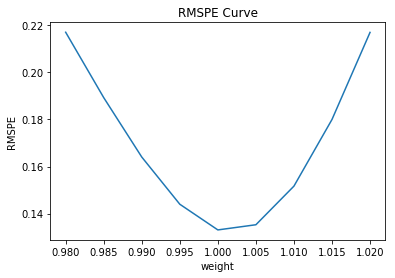

In [47]:
# rmspe correction on the whole
def correction():
    weights = np.arange(0.98, 1.02, 0.005)
    errors = []
    for w in weights:
        error = rmspe(np.expm1(y_valid), np.expm1(y_pred*w))
        errors.append(error)
        
    # make line plot
    plt.plot(weights, errors)
    plt.xlabel('weight')
    plt.ylabel('RMSPE')
    plt.title('RMSPE Curve')
    # print min error
    idx = errors.index(min(errors))
    print('Best weight is {}, RMSPE is {:.4f}'.format(weights[idx], min(errors)))
    
correction()


In [48]:
x_train_total.head().append(x_train_total.tail())

,Store,DayOfWeek,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
1,1,3,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2013,1,2,1,52.0,24156.25,0
2,1,4,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2013,1,3,1,52.0,24156.25,0
3,1,5,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2013,1,4,1,52.0,24156.25,0
4,1,6,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2013,1,5,1,52.0,24156.25,0
6,1,1,1,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2013,1,7,2,52.0,24156.50,0
949188,988,2,0,0,1,1,30.0,11.0,2012.0,0,0.0,0.0,2015,5,26,22,30.0,24185.50,0
949189,988,3,0,0,1,1,30.0,11.0,2012.0,0,0.0,0.0,2015,5,27,22,30.0,24185.50,0
949190,988,4,0,0,1,1,30.0,11.0,2012.0,0,0.0,0.0,2015,5,28,22,30.0,24185.50,0
949191,988,5,0,0,1,1,30.0,11.0,2012.0,0,0.0,0.0,2015,5,29,22,30.0,24185.50,0
949192,988,6,0,0,1,1,30.0,11.0,2012.0,0,0.0,0.0,2015,5,30,22,30.0,24185.50,0


In [49]:
print(x_train_total.shape)
print(y_train_total.shape)

(785727, 19)
(785727,)


In [50]:
dtrain = xgb.DMatrix(x_train_total, y_train_total)
dtest = xgb.DMatrix(x_test)
# specify parameters via map
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_round = 3000
model = xgb.train(params, dtrain, num_round)
# make prediction
preds = model.predict(dtest)

In [77]:
dtrain2 = xgb.DMatrix(x_train_total)
pred2 = model.predict(dtrain2)

In [ ]:
result = pd.DataFrame({"ID": test["ID"],'Sales': np.expm1(preds*0.995)})

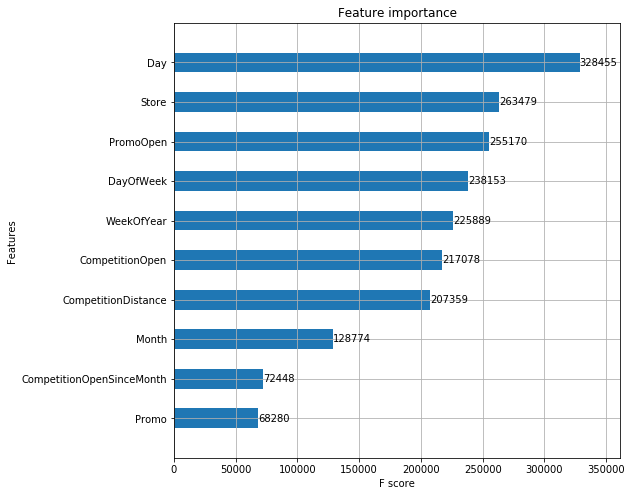

In [56]:
# make submission using best weight
result = pd.DataFrame({"ID": test["ID"],'Sales': np.expm1(preds*0.995)})
result.to_csv("submission_xgb.csv", index=False)

# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()

Reference:  

1. [XGBoost documentation](http://xgboost.readthedocs.io/en/latest/parameter.html#)  
2. [Model documentation 1st place](http://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
3. [XGBoost Feature Importance](https://www.kaggle.com/cast42/xgboost-in-python-with-rmspe-v2/code)
4. [Rossmann Sales Top1%](https://www.kaggle.com/xwxw2929/rossmann-sales-top1)


    

In [52]:
test.head()

,ID,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Month,Year,Day,WeekOfYear,CompetitionOpen,PromoOpen,month_str,IsPromoMonth
0,1,1,6,2015-06-20,1,0,0,0,3,1,...,0.0,0,6,2015,20,25,81.0,24186.25,Jun,0
1,1116,1,7,2015-06-21,0,0,0,0,3,1,...,0.0,0,6,2015,21,25,81.0,24186.25,Jun,0
2,2231,1,1,2015-06-22,1,0,0,0,3,1,...,0.0,0,6,2015,22,26,81.0,24186.50,Jun,0
3,3346,1,2,2015-06-23,1,0,0,0,3,1,...,0.0,0,6,2015,23,26,81.0,24186.50,Jun,0
4,4461,1,3,2015-06-24,1,0,0,0,3,1,...,0.0,0,6,2015,24,26,81.0,24186.50,Jun,0


In [58]:
y_test = clf.predict(x_test)

In [60]:
np.expm1(y_test)

array([4182.77547543, 4185.46938818, 3828.66171811, ..., 7471.94767185,
       8247.26914566, 8282.35846079])

In [61]:
x_test

,Store,DayOfWeek,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,6,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,20,25,81.0,24186.25,0
1,1,7,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,21,25,81.0,24186.25,0
2,1,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,22,26,81.0,24186.50,0
3,1,2,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,23,26,81.0,24186.50,0
4,1,3,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,24,26,81.0,24186.50,0
5,1,4,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,25,26,81.0,24186.50,0
6,1,5,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,26,26,81.0,24186.50,0
7,1,6,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,27,26,81.0,24186.50,0
8,1,7,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,28,26,81.0,24186.50,0
9,1,1,1,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,29,27,81.0,24186.75,0


In [62]:
result = pd.DataFrame({"ID": test["ID"],'Sales': np.expm1(y_test)})
result.to_csv("submission_rf.csv", index=False)

In [63]:
result.head()

,ID,Sales
0,1,4182.775475
1,1116,4185.469388
2,2231,3828.661718
3,3346,3582.451226
4,4461,3734.990346


In [64]:
def partial_dependency(bst, X, y, feature_ids = [], f_id = -1):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()

    grid = np.linspace(np.percentile(X_temp[:, f_id], 0.1),
                       np.percentile(X_temp[:, f_id], 99.5),
                       50)
    y_pred = np.zeros(len(grid))

    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):

            X_temp[:, f_id] = val
            data = xgb.DMatrix(X_temp, feature_names = df_columns)

            y_pred[i] = np.average(bst.predict(data))

    return grid, y_pred

In [66]:
df_columns = train.columns

In [67]:
lst_f = ['Day', 'Store', 'PromoOpen']
for f in lst_f:
    f_id = df_columns.tolist().index(f)


    feature_ids = range(X_train.shape[1])

    grid, y_pred = partial_dependency(model,
                                      X_train,
                                      ylog1p_train,
                                      feature_ids = feature_ids,
                                      f_id = f_id
                                      )

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    plt.subplots_adjust(left = 0.17, right = 0.94, bottom = 0.15, top = 0.9)

    ax.plot(grid, y_pred, '-', color = 'red', linewidth = 2.5, label='fit')
    ax.plot(X_train[:, f_id], ylog1p_train, 'o', color = 'grey', alpha = 0.01)

    ax.set_xlim(min(grid), max(grid))
    ax.set_ylim(0.95 * min(y_pred), 1.05 * max(y_pred))

    ax.set_xlabel(f, fontsize = 24)
    ax.set_ylabel('Partial Dependence', fontsize = 24)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.show()

NameError: name 'X_train' is not defined